### Reconstruction of Image A with nnf obtained from Image A and Image B.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from nnf import NNF

In [50]:
def reconstruct_img(img1, img2, patch_w=7, pm_iters=5):
    """
    Reconstruct the image using the nearest neighbor field
    """
    h, w = img1.shape[:2]
    output = img1.copy()
    patch_match = NNF(img1, img2, patch_w=patch_w, pm_iters=pm_iters)
    nnf, nnf_dist = patch_match.compute_nnf()

    for ay in range(h):
        for ax in range(w):
            by, bx = nnf[ay, ax]
            
            if not patch_match._in_border(ax, ay):

                output[ay - patch_w//2:ay + patch_w//2 + 1, ax - patch_w//2:ax + patch_w//2 + 1] = \
                    img2[by - patch_w//2:by + patch_w//2 + 1, bx - patch_w//2:bx + patch_w//2 + 1]
                

    return output, nnf, nnf_dist

In [51]:
def reconstruct_img_average(img1, img2, patch_w=7, pm_iters=5):
    """
    Reconstruct the image by averaging pixels from all the patches it is a part of.
    """
    h, w = img1.shape[:2]
    output = np.zeros_like(img1, dtype=np.float32)
    count = np.zeros_like(img1, dtype=np.float32)
    
    patch_match = NNF(img1, img2, patch_w=patch_w, pm_iters=pm_iters)
    nnf, nnf_dist = patch_match.compute_nnf()
    
    for ay in range(h):
        for ax in range(w):
            by, bx = nnf[ay, ax]

            if not patch_match._in_border(ax, ay):
            
                output[ay - patch_w//2:ay + patch_w//2 + 1, ax - patch_w//2:ax + patch_w//2 + 1] += \
                    img2[by - patch_w//2:by + patch_w//2 + 1, bx - patch_w//2:bx + patch_w//2 + 1]
            
                count[ay - patch_w//2:ay + patch_w//2 + 1, ax - patch_w//2:ax + patch_w//2 + 1] += 1
    
    output /= count
        
    return output.astype(np.uint8), nnf, nnf_dist


In [52]:
def plot_reconstructed_images(img1, img2, recon):    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Image A')
    ax[0].axis('off')

    ax[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    ax[1].set_title('Image B')
    ax[1].axis('off')

    ax[2].imshow(cv2.cvtColor(recon, cv2.COLOR_BGR2RGB))
    ax[2].set_title('Reconstructed A using B and NNF(A to B)')
    ax[2].axis('off')

    plt.show()

In [53]:
a = cv2.imread('../images/a.png')
b = cv2.imread('../images/b.png')

In [54]:
recon_a, _, _ = reconstruct_img(a, b)

In [56]:
recon_a_using_avg, _, _ = reconstruct_img_average(a, b)

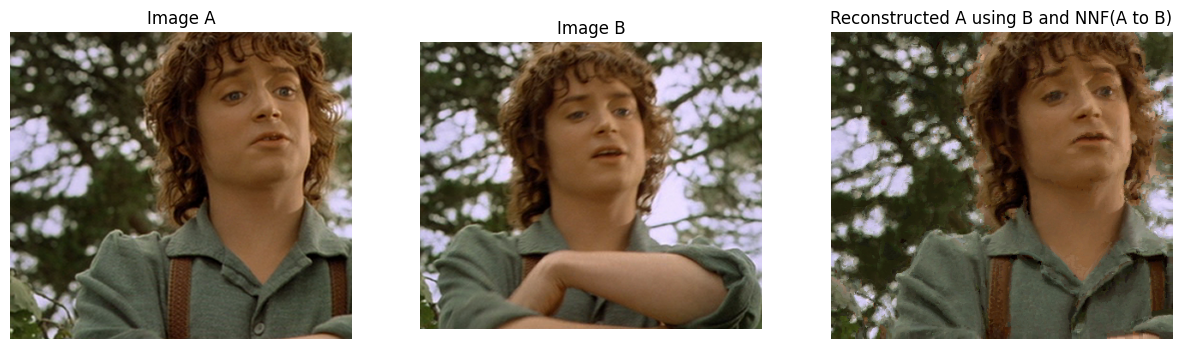

In [57]:
plot_reconstructed_images(a, b, recon_a)

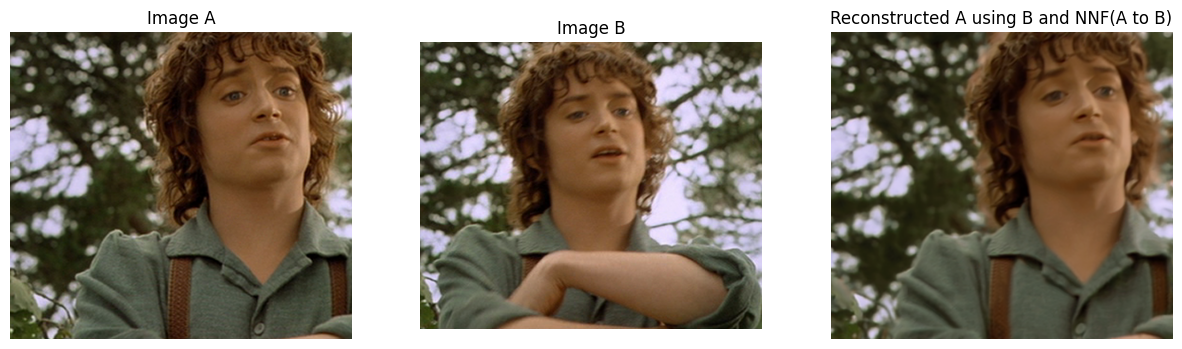

In [58]:
plot_reconstructed_images(a, b, recon_a_using_avg)

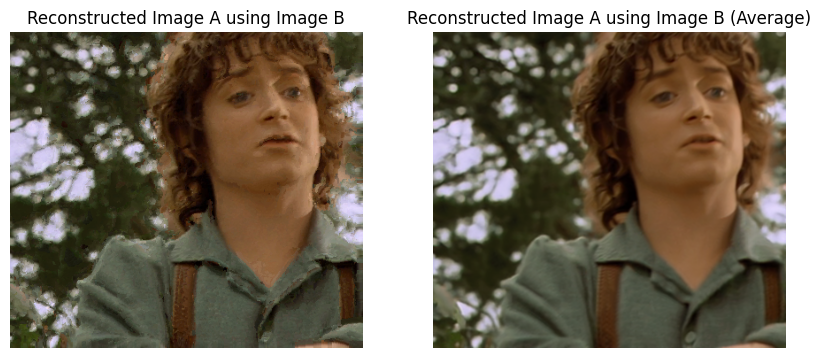

In [59]:
# compare the two methods
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(recon_a, cv2.COLOR_BGR2RGB))
ax[0].set_title('Reconstructed Image A using Image B')
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(recon_a_using_avg, cv2.COLOR_BGR2RGB))
ax[1].set_title('Reconstructed Image A using Image B (Average)')
ax[1].axis('off')

plt.show()

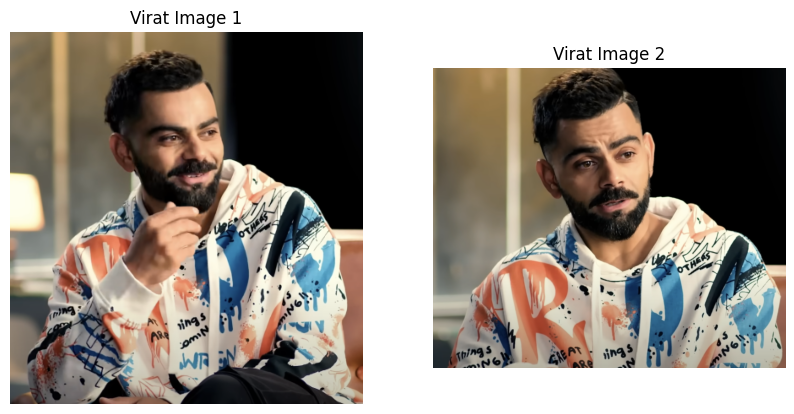

In [116]:
virat_a = cv2.imread('../images/virat_1.png')
virat_b = cv2.imread('../images/virat_2.png')

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(virat_a, cv2.COLOR_BGR2RGB))
ax[0].set_title('Virat Image 1')
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(virat_b, cv2.COLOR_BGR2RGB))
ax[1].set_title('Virat Image 2')
ax[1].axis('off')

plt.show()



##### Compute NNF of the two images (source is Image A and target is Image B) using PatchMatch algorithm and use the NNF of Image A and Image B to reconstruct Image A.

In [61]:
recon_virat_a, _, _ = reconstruct_img(virat_a, virat_b)

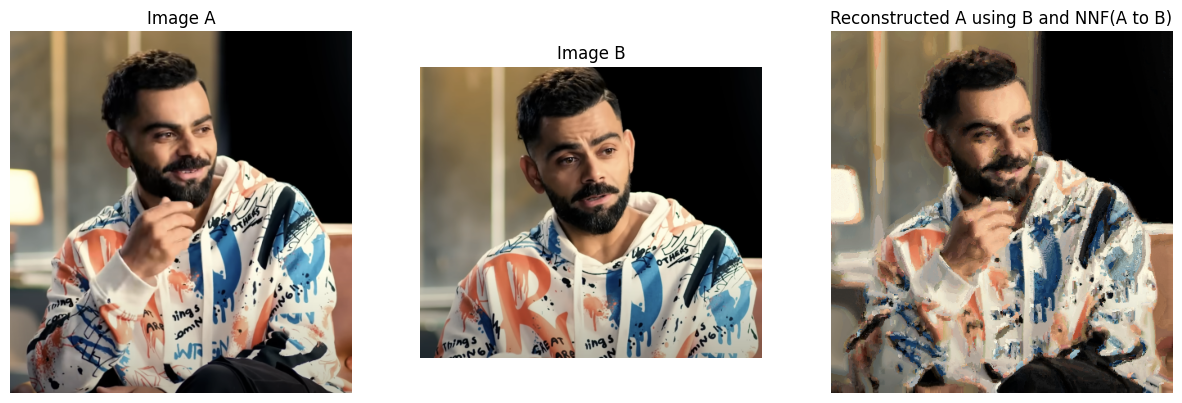

In [62]:
plot_reconstructed_images(virat_a, virat_b, recon_virat_a)

In [63]:
recon_virat_a_avg, nnf_virat, nnf_dist_virat = reconstruct_img_average(virat_a, virat_b)

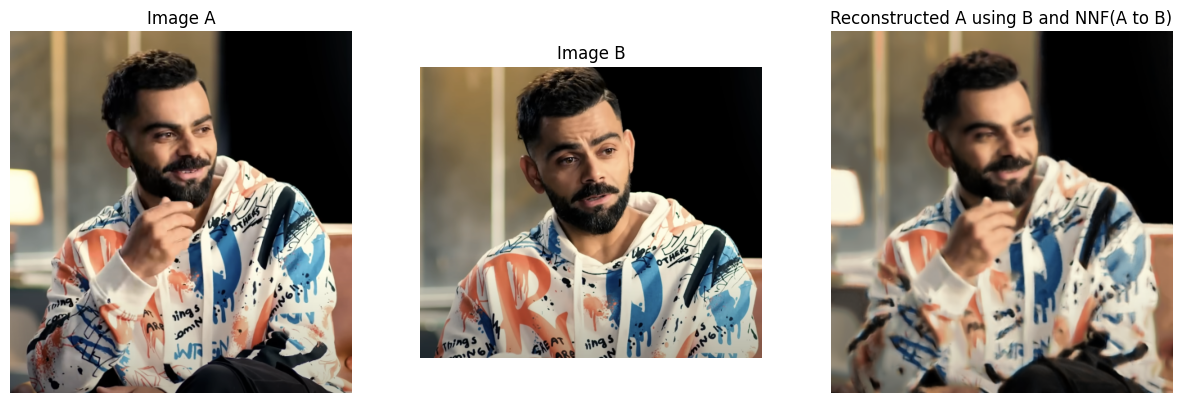

In [66]:
plot_reconstructed_images(virat_a, virat_b, recon_virat_a_avg)

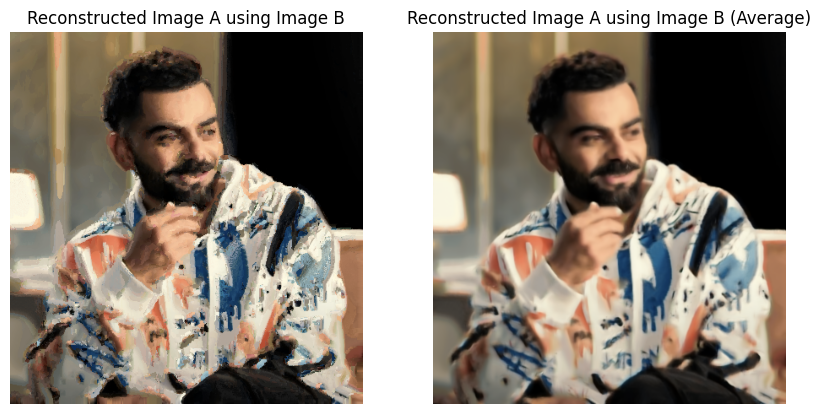

In [67]:
# compare the two methods
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(recon_virat_a, cv2.COLOR_BGR2RGB))
ax[0].set_title('Reconstructed Image A using Image B')
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(recon_virat_a_avg, cv2.COLOR_BGR2RGB))
ax[1].set_title('Reconstructed Image A using Image B (Average)')
ax[1].axis('off')

plt.show()

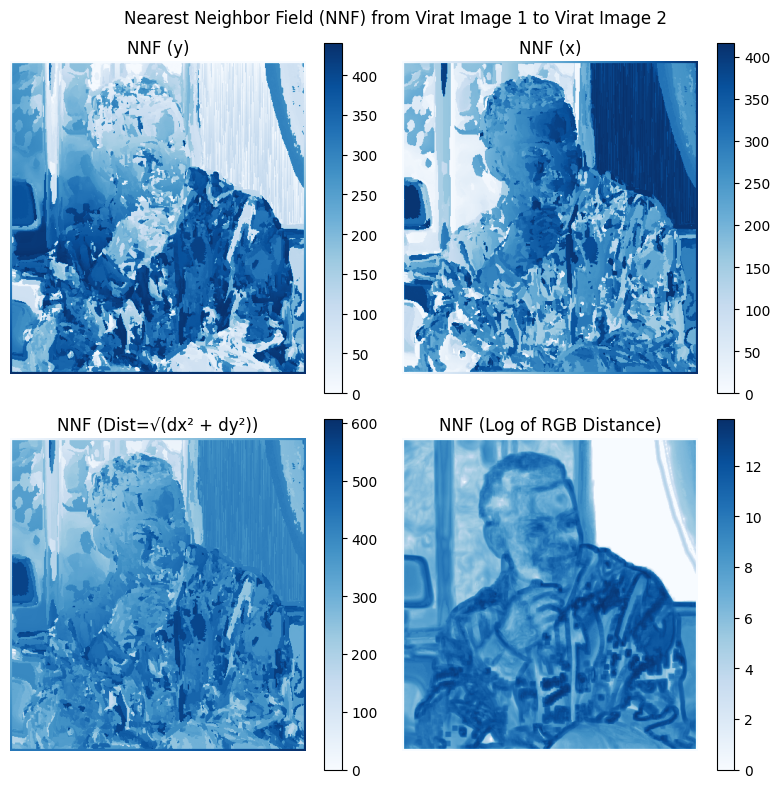

In [114]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax = ax.ravel()
plt.suptitle('Nearest Neighbor Field (NNF) from Virat Image 1 to Virat Image 2')

cmap = 'Blues'

# NNF (Y)
im0 = ax[0].imshow(nnf_virat[:, :, 0], cmap=cmap)
ax[0].set_title('NNF (y)')
ax[0].axis('off')
plt.colorbar(im0, ax=ax[0])

# NNF (X)
im1 = ax[1].imshow(nnf_virat[:, :, 1], cmap=cmap)
ax[1].set_title('NNF (x)')
ax[1].axis('off')
plt.colorbar(im1, ax=ax[1])

# NNF (Dist=√(dx² + dy²))
im2 = ax[2].imshow(np.sqrt(nnf_virat[:, :, 1] **2 + nnf_virat[:, :, 0] ** 2), cmap=cmap)
ax[2].set_title('NNF (Dist=√(dx² + dy²))')
ax[2].axis('off')
plt.colorbar(im2, ax=ax[2])

# NNF (Log of RGB Distance)
im3 = ax[3].imshow(np.log(nnf_dist_virat + 1), cmap=cmap)
ax[3].set_title('NNF (Log of RGB Distance)')
ax[3].axis('off')
plt.colorbar(im3, ax=ax[3])

plt.tight_layout()
plt.show()


In [119]:
src_path = "../images/photo_bomb_2.jpg"
img = cv2.imread(src_path)
img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)

cv2.imwrite("../images/photo_bomb_2_resized.jpg", img)

True